In [9]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [10]:
df = pd.read_excel("data.xls")


In [11]:
# Data Preprocessing

cols = ['_id', 'battery', 'distance', 'location', 'name', 'source', 'ward_id']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('time')

   
df['time'] = pd.to_datetime(df['time'], unit='ms')


df = df[['time','pm25']]
df.isnull().sum()

time    0
pm25    0
dtype: int64

In [12]:
df.describe



<bound method NDFrame.describe of                     time  pm25
0    2019-07-01 18:30:26    19
1    2019-07-01 18:31:26    15
2    2019-07-01 18:32:26    13
3    2019-07-01 18:33:27    15
4    2019-07-01 18:34:27    15
...                  ...   ...
8197 2019-07-07 11:52:42    14
8198 2019-07-07 11:53:42    14
8199 2019-07-07 11:54:42    15
8200 2019-07-07 11:56:25    13
8201 2019-07-07 11:56:42    13

[8202 rows x 2 columns]>

In [13]:
#df = df.groupby('time')['pm25'].mean().reset_index()
df = df.set_index('time')
df.index
df

,pm25
time,
2019-07-01 18:30:26,19
2019-07-01 18:31:26,15
2019-07-01 18:32:26,13
2019-07-01 18:33:27,15
2019-07-01 18:34:27,15
2019-07-01 18:35:27,13
2019-07-01 18:36:27,12
2019-07-01 18:37:27,11
2019-07-01 18:38:27,12


In [45]:
train=df[0:7000] 
test=df[7000:7010]

test

,pm25
time,
2019-07-06 15:47:35,12
2019-07-06 15:48:35,13
2019-07-06 15:49:35,14
2019-07-06 15:50:35,14
2019-07-06 15:51:35,18
2019-07-06 15:52:35,15
2019-07-06 15:53:35,14
2019-07-06 15:54:35,15
2019-07-06 15:55:35,17


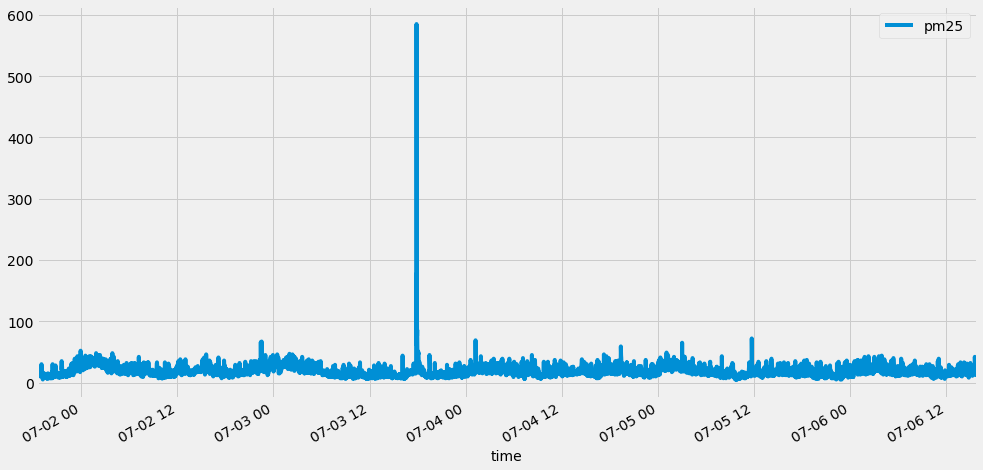

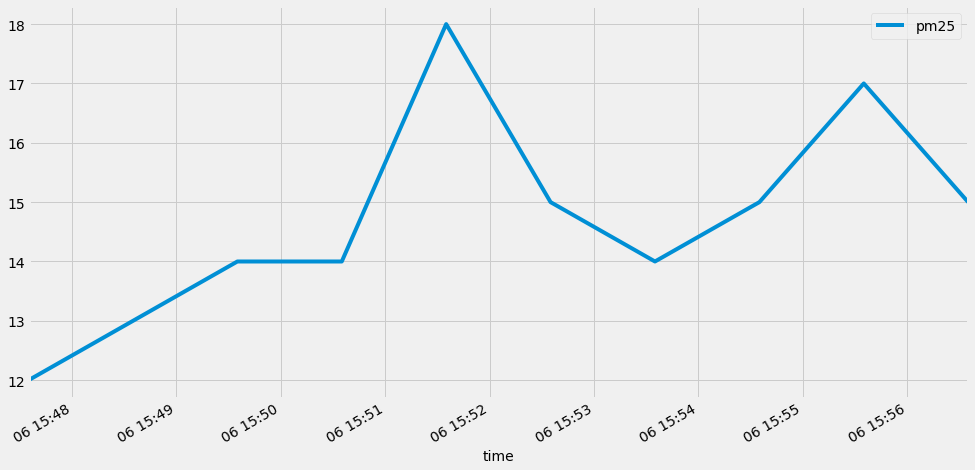

In [46]:
train.plot(figsize=(15,8), fontsize=14)
test.plot(figsize=(15,8), fontsize=14)
plt.show()


6999    15.762140
7000    16.600750
7001    16.999997
7002    17.190220
7003    17.281001
7004    17.324474
7005    17.345440
7006    17.355699
7007    17.360863
7008    17.363604
7009    17.365193
dtype: float64


time
2019-07-06 15:47:35    12
2019-07-06 15:48:35    13
2019-07-06 15:49:35    14
2019-07-06 15:50:35    14
2019-07-06 15:51:35    18
2019-07-06 15:52:35    15
2019-07-06 15:53:35    14
2019-07-06 15:54:35    15
2019-07-06 15:55:35    17
2019-07-06 15:56:35    15
Name: pm25, dtype: int64

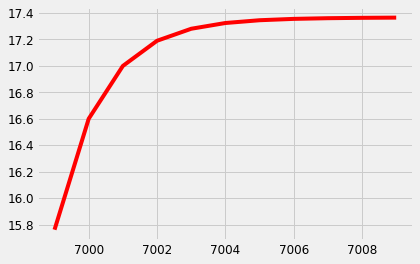

In [47]:

from statsmodels.tsa.arima_model import ARIMA
from random import random

# fit model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test), typ='levels')
print(yhat)
y = test['pm25']

plt.plot(yhat, color = "red")
y